In [20]:
## HA

import numpy as np
import os
import json
import tensorflow as tf
import random
from collections import namedtuple
from rnn.rnn import MDNRNN, sample_sequence, rnn_next_state, rnn_init_state
from vae.vae import ConvVAE, reset_graph
import matplotlib.pyplot as plt
from IPython import display

z_size=32

In [21]:
HyperParams = namedtuple('HyperParams', ['num_steps',
                                         'max_seq_len',
                                         'input_seq_width',
                                         'output_seq_width',
                                         'rnn_size',
                                         'batch_size',
                                         'grad_clip',
                                         'num_mixture',
                                         'learning_rate',
                                         'decay_rate',
                                         'min_learning_rate',
                                         'use_layer_norm',
                                         'use_recurrent_dropout',
                                         'recurrent_dropout_prob',
                                         'use_input_dropout',
                                         'input_dropout_prob',
                                         'use_output_dropout',
                                         'output_dropout_prob',
                                         'is_training',
                                        ])
def default_hps():
  return HyperParams(num_steps=2000, # train model for 2000 steps.
                     max_seq_len=300, # train on sequences of 100
                     input_seq_width=35,    # width of our data (32 + 3 actions)
                     output_seq_width=32,    # width of our data is 32
                     rnn_size=256,    # number of rnn cells
                     batch_size=100,   # minibatch sizes
                     grad_clip=1.0,
                     num_mixture=5,   # number of mixtures in MDN
                     learning_rate=0.001,
                     decay_rate=1.0,
                     min_learning_rate=0.00001,
                     use_layer_norm=0, # set this to 1 to get more stable results (less chance of NaN), but slower
                     use_recurrent_dropout=0,
                     recurrent_dropout_prob=0.90,
                     use_input_dropout=0,
                     input_dropout_prob=0.90,
                     use_output_dropout=0,
                     output_dropout_prob=0.90,
                     is_training=1)

hps_model = default_hps()
hps_sample = hps_model._replace(batch_size=1, max_seq_len=1, use_recurrent_dropout=0, is_training=0)


In [22]:
model_path_name = "rnn"
rnn = MDNRNN(hps_sample, gpu_mode=False, reuse=True)
rnn.load_json(os.path.join(model_path_name, 'rnn.json'))

model using cpu
input dropout mode = False
output dropout mode = False
recurrent dropout mode = False


In [23]:
vae = ConvVAE(z_size=z_size,
              batch_size=1,
              is_training=False,
              reuse=False,
              gpu_mode=False)

vae.load_json(os.path.join('vae', 'vae.json'))

INFO:tensorflow:Model using cpu.


In [24]:
actions = np.array([[0,1,0]] * 100)
init_z = np.array([ -2.4694,  0.366,   1.4479,  0.1444,  0.2775, -1.1309,  0.4608,  1.0444, -1.8297, -0.2489,  3.2962
                   ,  1.2319,0.7201,  0.7283, -0.0496,  0.7083, -0.642,  -1.2478, -0.6569,  0.8255, -0.6978 , 0.3791, -1.378,   0.0756,
 -0.4296, -0.7886, -0.4733 , 0.5146,  0.9496,  1.1044 , 0.0912,  0.4718])
sess = rnn.sess

In [25]:
batch_z = sample_sequence(sess, rnn, hps_sample, init_z, actions, temperature=0.1, seq_len=100)

In [26]:
init_z

array([-2.4694,  0.366 ,  1.4479,  0.1444,  0.2775, -1.1309,  0.4608,
        1.0444, -1.8297, -0.2489,  3.2962,  1.2319,  0.7201,  0.7283,
       -0.0496,  0.7083, -0.642 , -1.2478, -0.6569,  0.8255, -0.6978,
        0.3791, -1.378 ,  0.0756, -0.4296, -0.7886, -0.4733,  0.5146,
        0.9496,  1.1044,  0.0912,  0.4718])

In [27]:
batch_z[0]

array([-0.24917102,  0.20630275, -0.03625564, -0.25020278,  0.19813958,
       -0.40737104,  0.0365254 , -0.22675484, -0.04413764, -0.27859384,
        0.89477354, -0.0133665 , -0.13696349, -0.53773928, -0.22895315,
        0.32714406,  0.3806842 ,  0.04176348, -0.50365388,  0.43245038,
        0.26770076,  0.1623366 ,  0.46544594,  0.43535182,  0.195316  ,
        0.34363431,  0.03516658,  0.64974445, -0.01315871,  0.28042954,
        0.06172721,  0.03553852], dtype=float32)

In [28]:

print(batch_z[0]) # print out sampled z
reconstruct = vae.decode(batch_z)


[-0.24917102  0.20630275 -0.03625564 -0.25020278  0.19813958 -0.40737104
  0.0365254  -0.22675484 -0.04413764 -0.27859384  0.89477354 -0.0133665
 -0.13696349 -0.53773928 -0.22895315  0.32714406  0.3806842   0.04176348
 -0.50365388  0.43245038  0.26770076  0.1623366   0.46544594  0.43535182
  0.195316    0.34363431  0.03516658  0.64974445 -0.01315871  0.28042954
  0.06172721  0.03553852]


KeyboardInterrupt: 

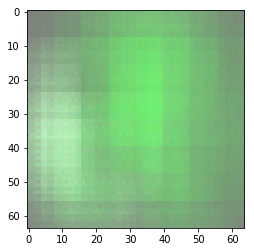

In [29]:
for i in range(100):
    plt.imshow(reconstruct[i])
#     plt.show()
    display.clear_output(wait=True)
    display.display(plt.gcf()) 